In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(bos, boston.target, test_size = 0.2, random_state = 5)
print(bos.shape[0])
print(float(XTrain.shape[0]) / float(bos.shape[0]))
print(float(XTest.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


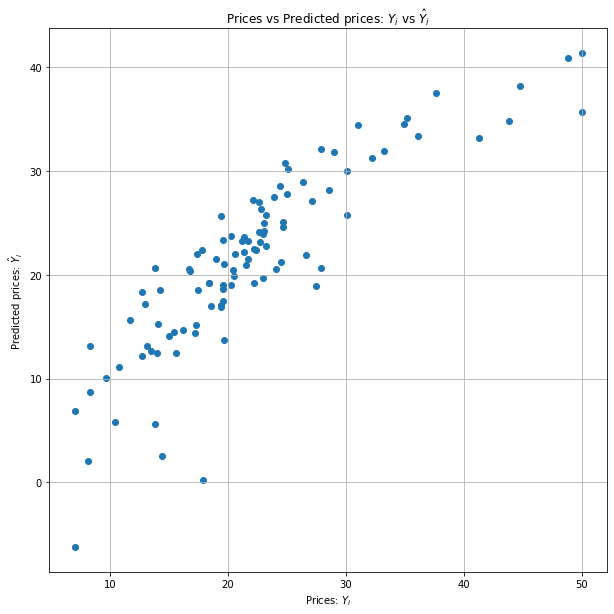

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(XTrain, yTrain)
yPred = regr.predict(XTest)

from matplotlib import pyplot as plt
plt.figure(figsize = [10, 10])
plt.scatter(yTest, yPred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
plt.show()

In [6]:
#Ideal scatter should be a line y = x

from sklearn.metrics import mean_squared_error
print('Mean squared error: {0:.2f}'.format(mean_squared_error(yTest, yPred)))

Mean squared error: 20.87


In [7]:
print('Score: {0:.2f}'.format(regr.score(XTest, yTest)))

Score: 0.73


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(bos)
y = boston.target

In [9]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X = polynomial_features.fit_transform(X)

In [10]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 5)
regr = LinearRegression().fit(XTrain, yTrain)
yPred = regr.predict(XTest)
print('Mean squared error: {0:.2f}'.format(mean_squared_error(yTest, yPred)))
print('Score: {0:.2f}'.format(regr.score(XTest, yTest)))

Mean squared error: 17.85
Score: 0.81


In [11]:
from sklearn.linear_model import Ridge, Lasso
scoresLTrain = []
scoresLTest = []
scoresRTrain = []
scoresRTest = []
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for alpha in alphas:
    regrL = Lasso(alpha = alpha).fit(XTrain, yTrain)
    regrR = Ridge(alpha = alpha).fit(XTrain, yTrain)
    scoresLTrain.append(regrL.score(XTrain, yTrain))
    scoresRTrain.append(regrR.score(XTrain, yTrain))
    scoresLTest.append(regrL.score(XTest, yTest))
    scoresRTest.append(regrR.score(XTest, yTest))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882.5715534954056, tolerance: 2.826239132768362
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.78833674259977, tolerance: 2.826239132768362
  model = cd_fast.enet_coordinate_descent(


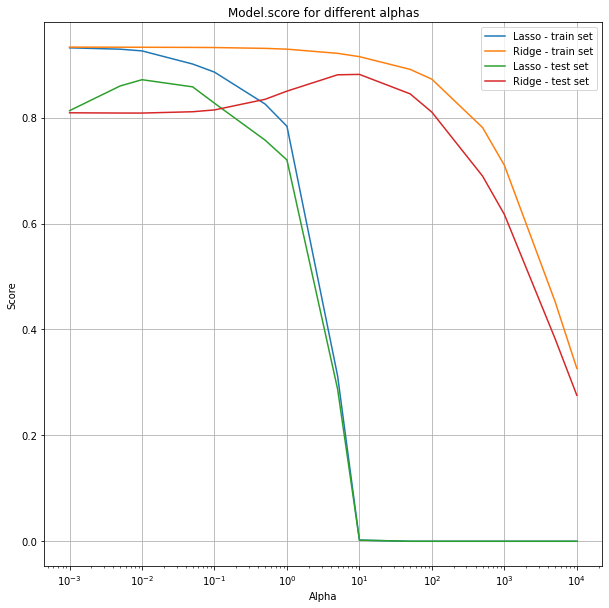

In [30]:
plt.figure(figsize = [10, 10])
plt.semilogx(alphas, scoresLTrain, label = 'Lasso - train set')
plt.semilogx(alphas, scoresRTrain, label = 'Ridge - train set')
plt.semilogx(alphas, scoresLTest, label = 'Lasso - test set')
plt.semilogx(alphas, scoresRTest, label = 'Ridge - test set')
plt.title('Model.score for different alphas')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()


In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data)
data.fillna(data.mean())
data.drop(0, axis = 1, inplace = True)

In [28]:
data = StandardScaler().fit_transform(data)
XTrain, XTest, yTrain, yTest = train_test_split(data, cancer.target, test_size = 0.2, random_state = 5)

from sklearn.linear_model import LogisticRegression
logregr = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear').fit(XTrain, yTrain)
print('Accuracy: {0:.2f}'.format(logregr.score(XTest, yTest)))

Accuracy: 0.98


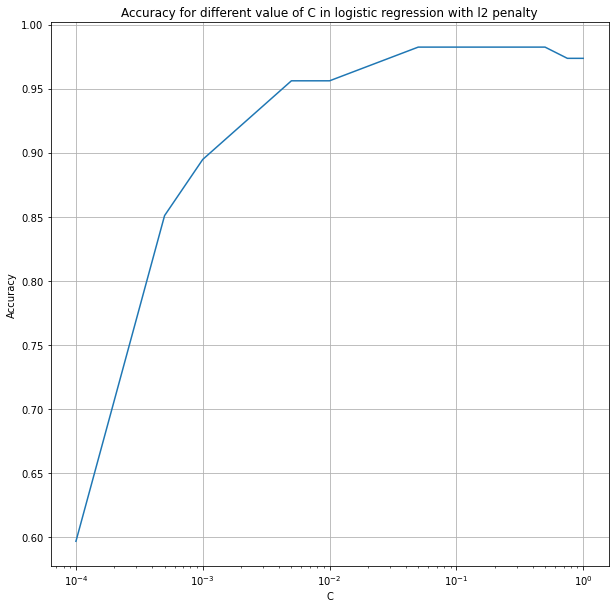

In [29]:
Cs = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1]
accs = []
for C in Cs:
    logregr2 = LogisticRegression(penalty = 'l2', C = C).fit(XTrain, yTrain)
    accs.append(logregr2.score(XTest, yTest))
plt.figure(figsize = [10, 10])
plt.semilogx(Cs, accs)
plt.title('Accuracy for different value of C in logistic regression with l2 penalty')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

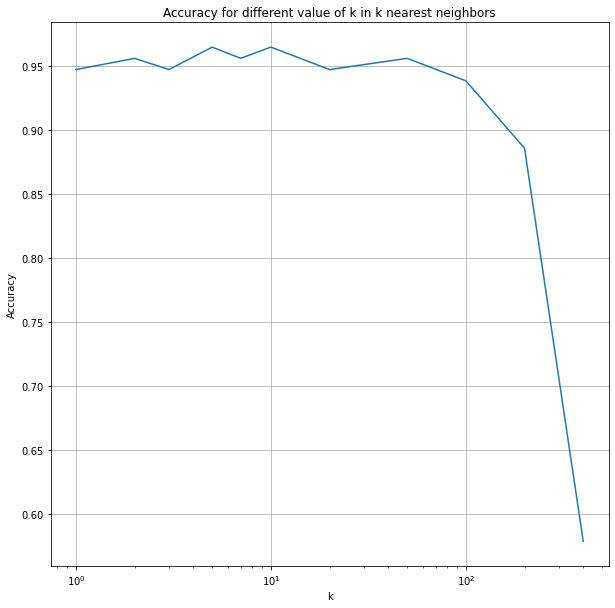

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

ks = [1, 2, 3, 5, 7, 10, 20, 50, 100, 200, 400]
accs = []
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X = XTrain, y = yTrain)
    yPred = neigh.predict(XTest)
    accs.append(accuracy_score(yTest, yPred))

plt.figure(figsize = [10, 10])
plt.semilogx(ks, accs)
plt.title('Accuracy for different value of k in k nearest neighbors')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

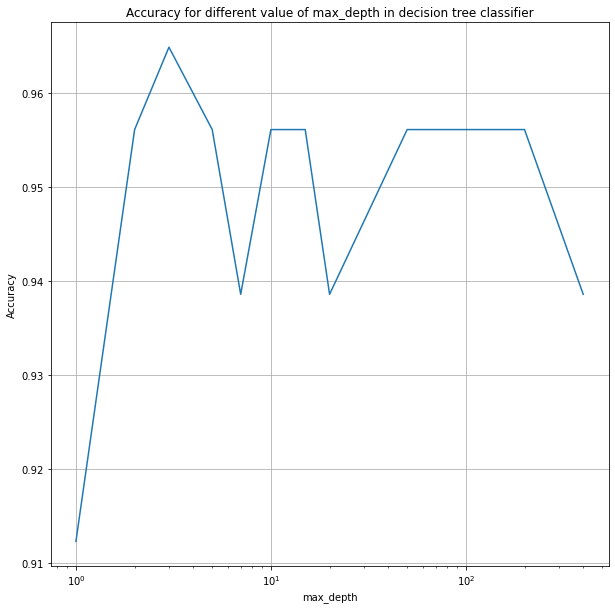

In [38]:
#Optimal k is 5 or 10

from sklearn.tree import DecisionTreeClassifier

depths = [1, 2, 3, 5, 7, 10, 15, 20, 50, 100, 200, 400]
accs = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth = depth)
    tree.fit(XTrain, yTrain)
    yPred = tree.predict(XTest)
    accs.append(accuracy_score(yTest, yPred))

plt.figure(figsize = [10, 10])
plt.semilogx(depths, accs)
plt.title('Accuracy for different value of max_depth in decision tree classifier')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
#Optimal value of max_depth is 3